In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import rand_score, silhouette_score

from scipy.cluster.hierarchy import dendrogram

from fcmeans import FCM

from sklearn_som.som import SOM

# Loading and showing the data

In [3]:
path_load = 'Inputs/'
path_to_save = 'Outputs/'
file = 'To clustering - V5.0.csv'
df_original = pd.read_csv(path_load + file) # This variable will keep the same value

In [4]:
df_original.head().round(decimals=2)

,ID,Days with measures,Measurements,Average,0000 - 0600 Total,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,...,1600 - 2000 STD,1600 - 2000 MIN,1600 - 2000 MAX,2000 - 2400 Total,2000 - 2400 Hypo,2000 - 2400 Hyper,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX
0,LIB194166,315,33372,131.53,8194,252,581,121.95,37.41,53.0,...,47.85,53.0,358.0,5468,163,722,132.89,40.72,53.0,302.0
1,LIB194165,259,23863,179.31,6017,222,3473,195.92,73.13,46.0,...,77.49,50.0,457.0,3649,251,1270,158.55,68.05,40.0,403.0
2,LIB194164,632,58350,152.40,13964,901,3841,147.79,56.17,43.0,...,52.41,53.0,347.0,9520,225,3043,157.71,50.48,49.0,342.0
3,LIB194163,192,17755,151.13,4367,227,1335,153.45,63.24,40.0,...,69.32,53.0,500.0,2849,108,748,148.12,55.31,53.0,417.0
4,LIB194162,361,33440,149.59,8181,751,2200,146.61,65.14,48.0,...,59.64,43.0,469.0,5536,252,1823,157.27,61.21,45.0,428.0


In [6]:
df_original.rename(columns={'ID':'Patient_ID'}, inplace=True)

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           736 non-null    object 
 1   Days with measures   736 non-null    int64  
 2   Measurements         736 non-null    int64  
 3   Average              736 non-null    float64
 4   0000 - 0600 Total    736 non-null    int64  
 5   0000 - 0600 Hypo     736 non-null    int64  
 6   0000 - 0600 Hyper    736 non-null    int64  
 7   0000 - 0600 Average  736 non-null    float64
 8   0000 - 0600 STD      736 non-null    float64
 9   0000 - 0600 MIN      736 non-null    float64
 10  0000 - 0600 MAX      736 non-null    float64
 11  0600 - 1300 Total    736 non-null    int64  
 12  0600 - 1300 Hypo     736 non-null    int64  
 13  0600 - 1300 Hyper    736 non-null    int64  
 14  0600 - 1300 Average  736 non-null    float64
 15  0600 - 1300 STD      736 non-null    flo

In [8]:
df_original.iloc[:,0].unique()

array(['LIB194166', 'LIB194165', 'LIB194164', 'LIB194163', 'LIB194162',
       'LIB194161', 'LIB194160', 'LIB194159', 'LIB194158', 'LIB194157',
       'LIB194156', 'LIB194155', 'LIB194153', 'LIB194152', 'LIB194150',
       'LIB194148', 'LIB194146', 'LIB194144', 'LIB194143', 'LIB194142',
       'LIB194141', 'LIB194140', 'LIB194139', 'LIB194137', 'LIB194136',
       'LIB194135', 'LIB194133', 'LIB194132', 'LIB194131', 'LIB194130',
       'LIB194129', 'LIB194128', 'LIB194127', 'LIB194126', 'LIB194125',
       'LIB194124', 'LIB194123', 'LIB194122', 'LIB194121', 'LIB194120',
       'LIB194117', 'LIB194116', 'LIB194115', 'LIB194114', 'LIB194113',
       'LIB194112', 'LIB194111', 'LIB194110', 'LIB194109', 'LIB194108',
       'LIB194107', 'LIB194106', 'LIB194105', 'LIB194104', 'LIB194102',
       'LIB194101', 'LIB194099', 'LIB194098', 'LIB194097', 'LIB194095',
       'LIB194094', 'LIB194093', 'LIB194092', 'LIB194091', 'LIB194090',
       'LIB194089', 'LIB194088', 'LIB194087', 'LIB194086', 'LIB1

# Add age and sex to the loaded dataset

In [9]:
# Load the dataframe with the Age and sex (Patient_info.csv)
info_file = 'Patient_info.csv'
info_path = '../T1DiabetesGranada/'
df_patient_info = pd.read_csv(info_path + info_file)
df_patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient_ID                           736 non-null    object 
 1   Sex                                  736 non-null    object 
 2   Birth_year                           736 non-null    int64  
 3   Initial_measurement_date             736 non-null    object 
 4   Final_measurement_date               736 non-null    object 
 5   Number_of_days_with_measures         736 non-null    int64  
 6   Number_of_measurements               736 non-null    int64  
 7   Initial_biochemical_parameters_date  723 non-null    object 
 8   Final_biochemical_parameters_date    723 non-null    object 
 9   Number_of_biochemical_parameters     723 non-null    float64
 10  Number_of_diagnostics                511 non-null    float64
dtypes: float64(2), int64(3), object(

In [10]:
df_patient_info.head()

,Patient_ID,Sex,Birth_year,Initial_measurement_date,Final_measurement_date,Number_of_days_with_measures,Number_of_measurements,Initial_biochemical_parameters_date,Final_biochemical_parameters_date,Number_of_biochemical_parameters,Number_of_diagnostics
0,LIB193263,M,1965,2020-06-09,2022-03-19,648,60097,NaN,NaN,NaN,1.0
1,LIB193264,F,1975,2020-06-10,2022-03-19,326,26786,NaN,NaN,NaN,3.0
2,LIB193265,F,1980,2019-01-27,2022-03-19,581,46575,2018-09-05,2021-10-01,120.0,NaN
3,LIB193266,M,1998,2020-10-08,2022-03-21,500,55307,2020-08-21,2022-02-22,74.0,2.0
4,LIB193267,F,1980,2020-06-09,2022-03-17,647,55500,2018-04-30,2022-01-24,177.0,1.0


In [11]:
def get_age_in(birth_year:str, in_year:str) -> int:
    """
    From a string (in YYYY) get the age of the patient in a given date
    :param birth_year:  year of birth of the patient as a string
    :param in_year: year from where the age will be calculated
    :return: An integer with the age of the patient
    """
    birth_year_int = int(birth_year)
    in_year_int = int(in_year)

    age = in_year_int - birth_year_int

    return age

In [12]:
df_patient_info['Age'] = df_patient_info.apply(lambda row: get_age_in(row['Birth_year'], row['Final_measurement_date'][:4]), axis=1)
df_patient_info.head()

,Patient_ID,Sex,Birth_year,Initial_measurement_date,Final_measurement_date,Number_of_days_with_measures,Number_of_measurements,Initial_biochemical_parameters_date,Final_biochemical_parameters_date,Number_of_biochemical_parameters,Number_of_diagnostics,Age
0,LIB193263,M,1965,2020-06-09,2022-03-19,648,60097,NaN,NaN,NaN,1.0,57
1,LIB193264,F,1975,2020-06-10,2022-03-19,326,26786,NaN,NaN,NaN,3.0,47
2,LIB193265,F,1980,2019-01-27,2022-03-19,581,46575,2018-09-05,2021-10-01,120.0,NaN,42
3,LIB193266,M,1998,2020-10-08,2022-03-21,500,55307,2020-08-21,2022-02-22,74.0,2.0,24
4,LIB193267,F,1980,2020-06-09,2022-03-17,647,55500,2018-04-30,2022-01-24,177.0,1.0,42


# Sort Both dataframes

In [13]:
df_original.sort_values(by=['Patient_ID'], inplace=True)
df_patient_info.sort_values(by=['Patient_ID'], inplace=True)

df_original.reset_index(inplace=True, drop=True)
df_patient_info.reset_index(inplace=True, drop=True)

In [14]:
ID_demographics = df_patient_info.iloc[:, 0] # Demographics ID
ID_libre_view = df_original.iloc[:,0]       # LibreView ID

# Find intersections
ID_libre_view_intersection_demographic = ID_libre_view[ID_libre_view.isin(ID_demographics)]
ID_demographic_intersection_libre_view = ID_demographics[ID_demographics.isin(ID_libre_view)]

# The index of the elements of the intersection are not the same in each dataset, for that to access to each dataset they are needed separately.
lb_index = ID_libre_view_intersection_demographic.index # Index in the libreview dataset of elements that match with the intersection
dm_index = ID_demographic_intersection_libre_view.index # Index in the demographic dataset of elements that match with the intersection

# Assigning the values
df_original.loc[lb_index, 'Patient_ID_2'] = df_patient_info.loc[dm_index, 'Patient_ID'].values # Assign the values (without the index, because if not many NaN values appear)
df_original.loc[lb_index, 'Age'] = df_patient_info.loc[dm_index, 'Age'].values # Assign the values (without the index, because if not many NaN values appear)
df_original.loc[lb_index, 'Sex'] = df_patient_info.loc[dm_index, 'Sex'].values
df_original.loc[lb_index, 'Number_of_biochemical_parameters'] = df_patient_info.loc[dm_index, 'Number_of_biochemical_parameters'].values
df_original.loc[lb_index, 'Number_of_diagnostics'] = df_patient_info.loc[dm_index, 'Number_of_diagnostics'].values

In [16]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        736 non-null    object 
 1   Days with measures                736 non-null    int64  
 2   Measurements                      736 non-null    int64  
 3   Average                           736 non-null    float64
 4   0000 - 0600 Total                 736 non-null    int64  
 5   0000 - 0600 Hypo                  736 non-null    int64  
 6   0000 - 0600 Hyper                 736 non-null    int64  
 7   0000 - 0600 Average               736 non-null    float64
 8   0000 - 0600 STD                   736 non-null    float64
 9   0000 - 0600 MIN                   736 non-null    float64
 10  0000 - 0600 MAX                   736 non-null    float64
 11  0600 - 1300 Total                 736 non-null    int64  
 12  0600 - 1

In [17]:
df_original.drop(labels=['Patient_ID_2'], axis=1, inplace=True)

In [18]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        736 non-null    object 
 1   Days with measures                736 non-null    int64  
 2   Measurements                      736 non-null    int64  
 3   Average                           736 non-null    float64
 4   0000 - 0600 Total                 736 non-null    int64  
 5   0000 - 0600 Hypo                  736 non-null    int64  
 6   0000 - 0600 Hyper                 736 non-null    int64  
 7   0000 - 0600 Average               736 non-null    float64
 8   0000 - 0600 STD                   736 non-null    float64
 9   0000 - 0600 MIN                   736 non-null    float64
 10  0000 - 0600 MAX                   736 non-null    float64
 11  0600 - 1300 Total                 736 non-null    int64  
 12  0600 - 1

# Variable codification

In [19]:
df_original.replace({'Sex': {'M' : 0, 'F' : 1}}, inplace=True)

C:\Users\Ciro\AppData\Local\Temp\ipykernel_22568\46075012.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_original.replace({'Sex': {'M' : 0, 'F' : 1}}, inplace=True)


In [20]:
df_original['Sex'].value_counts(dropna=False)

Sex
1    373
0    363
Name: count, dtype: int64

## Add Total hypo and hyperglycemia to the dataset

In [21]:
df_original['Total_hypo'] = df_original[['0000 - 0600 Hypo', '0600 - 1300 Hypo', '0600 - 1300 Hypo', '1600 - 2000 Hypo', '2000 - 2400 Hypo']].sum(axis=1)
df_original.head()

,Patient_ID,Days with measures,Measurements,Average,0000 - 0600 Total,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,...,2000 - 2400 Hyper,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo
0,LIB193263,649,60098,177.817248,15431,361,7110,176.087421,59.873722,40.0,...,4374,184.284987,63.213750,40.0,459.0,57.0,0,NaN,1.0,1604
1,LIB193264,326,26787,149.991675,6733,428,2333,160.231695,65.464480,40.0,...,989,140.503562,57.586750,41.0,353.0,47.0,1,NaN,3.0,2146
2,LIB193265,581,46576,133.811298,11263,2408,1493,119.460091,61.743540,40.0,...,1136,135.097479,66.939892,41.0,500.0,42.0,1,120.0,NaN,8581
3,LIB193266,500,55308,155.201960,12286,357,3751,154.638206,57.571690,40.0,...,3042,167.311661,60.369626,40.0,462.0,24.0,0,74.0,2.0,1047
4,LIB193267,647,55501,181.668474,13807,390,6230,182.237126,75.258731,40.0,...,4627,199.350390,76.526081,53.0,488.0,42.0,1,177.0,1.0,1091


In [22]:
df_original['Total_hyper'] = df_original[['0000 - 0600 Hyper', '0600 - 1300 Hyper', '0600 - 1300 Hyper', '1600 - 2000 Hyper', '2000 - 2400 Hyper']].sum(axis=1)
df_original.head()

,Patient_ID,Days with measures,Measurements,Average,0000 - 0600 Total,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,...,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper
0,LIB193263,649,60098,177.817248,15431,361,7110,176.087421,59.873722,40.0,...,184.284987,63.213750,40.0,459.0,57.0,0,NaN,1.0,1604,30204
1,LIB193264,326,26787,149.991675,6733,428,2333,160.231695,65.464480,40.0,...,140.503562,57.586750,41.0,353.0,47.0,1,NaN,3.0,2146,10406
2,LIB193265,581,46576,133.811298,11263,2408,1493,119.460091,61.743540,40.0,...,135.097479,66.939892,41.0,500.0,42.0,1,120.0,NaN,8581,11408
3,LIB193266,500,55308,155.201960,12286,357,3751,154.638206,57.571690,40.0,...,167.311661,60.369626,40.0,462.0,24.0,0,74.0,2.0,1047,18428
4,LIB193267,647,55501,181.668474,13807,390,6230,182.237126,75.258731,40.0,...,199.350390,76.526081,53.0,488.0,42.0,1,177.0,1.0,1091,28622


In [23]:
df_original.shape

(736, 45)

## Dataset attribute stats

In [24]:
df_original.describe().round(decimals=2)

,Days with measures,Measurements,Average,0000 - 0600 Total,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,...,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper
count,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,...,736.00,736.00,736.00,736.00,736.00,736.00,723.00,511.00,736.00,736.00
mean,350.25,30803.95,167.71,7391.66,401.12,2650.57,166.54,60.98,47.40,405.37,...,175.35,64.25,50.83,413.05,45.06,0.51,121.00,3.44,1754.56,12841.50
std,284.15,25704.87,30.94,6143.59,645.31,2665.96,36.58,17.72,9.63,75.53,...,38.98,19.11,13.43,75.44,15.78,0.50,87.83,2.95,2531.10,12304.45
min,8.00,401.00,88.32,56.00,0.00,0.00,83.66,13.45,40.00,141.00,...,87.16,16.29,40.00,142.00,15.00,0.00,4.00,1.00,0.00,0.00
25%,122.75,10674.00,147.96,2525.75,42.00,669.25,142.31,49.41,40.00,353.75,...,149.66,50.75,40.00,354.75,32.00,0.00,75.00,1.00,240.50,4040.00
50%,286.00,25003.50,163.65,6131.50,171.50,1806.00,161.81,59.38,43.00,411.00,...,171.40,62.45,51.00,424.50,45.00,1.00,107.00,3.00,781.00,9493.00
75%,525.00,45687.50,183.20,10846.50,494.50,3914.25,184.52,69.73,53.00,474.00,...,193.48,74.77,54.00,489.00,57.00,1.00,137.00,4.00,2332.25,18417.50
max,1463.00,137293.00,314.50,34619.00,9056.00,18353.00,387.20,146.65,107.00,500.00,...,388.92,149.88,182.00,500.00,86.00,1.00,846.00,24.00,29387.00,84352.00


In [25]:
df_original.columns

Index(['Patient_ID', 'Days with measures', 'Measurements', 'Average',
       '0000 - 0600 Total', '0000 - 0600 Hypo', '0000 - 0600 Hyper',
       '0000 - 0600 Average', '0000 - 0600 STD', '0000 - 0600 MIN',
       '0000 - 0600 MAX', '0600 - 1300 Total', '0600 - 1300 Hypo',
       '0600 - 1300 Hyper', '0600 - 1300 Average', '0600 - 1300 STD',
       '0600 - 1300 MIN', '0600 - 1300 MAX', '1300 - 1600 Total',
       '1300 - 1600 Hypo', '1300 - 1600 Hyper', '1300 - 1600 Average',
       '1300 - 1600 STD', '1300 - 1600 MIN', '1300 - 1600 MAX',
       '1600 - 2000 Total', '1600 - 2000 Hypo', '1600 - 2000 Hyper',
       '1600 - 2000 Average', '1600 - 2000 STD', '1600 - 2000 MIN',
       '1600 - 2000 MAX', '2000 - 2400 Total', '2000 - 2400 Hypo',
       '2000 - 2400 Hyper', '2000 - 2400 Average', '2000 - 2400 STD',
       '2000 - 2400 MIN', '2000 - 2400 MAX', 'Age', 'Sex',
       'Number_of_biochemical_parameters', 'Number_of_diagnostics',
       'Total_hypo', 'Total_hyper'],
      dtype='obje

# Global variables

In [27]:
# Columns to drop. Not included in the analysis.
drop = ['Days with measures', 'Average', 'Measurements',
        '0000 - 0600 Total', '0600 - 1300 Total', '1300 - 1600 Total', '1600 - 2000 Total', '2000 - 2400 Total']

# ID variable
id_variable = 'Patient_ID'

# List of variables to include in the clustering analysis
var_to_clustering_process =['0000 - 0600 Average', '0000 - 0600 STD', '0000 - 0600 MIN', '0000 - 0600 MAX',
                        '0600 - 1300 Average','0600 - 1300 STD','0600 - 1300 MIN','0600 - 1300 MAX',
                        '1300 - 1600 Average','1300 - 1600 STD','1300 - 1600 MIN','1300 - 1600 MAX',
                        '1600 - 2000 Average','1600 - 2000 STD','1600 - 2000 MIN','1600 - 2000 MAX',
                        '2000 - 2400 Average','2000 - 2400 STD','2000 - 2400 MIN','2000 - 2400 MAX'
                            ]

# List of variables to include in the centroid analysis
var_to_centroids_analysis = ['Age', 'Sex', 'Number_of_biochemical_parameters', 'Number_of_diagnostics',
                        '0000 - 0600 Average', '0600 - 1300 Average','1300 - 1600 Average','1600 - 2000 Average','2000 - 2400 Average',
                        '0000 - 0600 Hypo', '0600 - 1300 Hypo', '1300 - 1600 Hypo', '1600 - 2000 Hypo', '2000 - 2400 Hypo',
                        '0000 - 0600 Hyper', '0600 - 1300 Hyper', '1300 - 1600 Hyper', '1600 - 2000 Hyper', '2000 - 2400 Hyper',
                        'Total_hypo', 'Total_hyper',
                        '0000 - 0600 STD','0000 - 0600 MIN','0000 - 0600 MAX',
                        '0600 - 1300 STD','0600 - 1300 MIN','0600 - 1300 MAX',
                        '1300 - 1600 STD','1300 - 1600 MIN','1300 - 1600 MAX',
                        '1600 - 2000 STD','1600 - 2000 MIN','1600 - 2000 MAX',
                        '2000 - 2400 STD','2000 - 2400 MIN','2000 - 2400 MAX'
                             ]

# Auxiliar set of variables
average_variables = ['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']
STD_variables = ['0000 - 0600 STD', '0600 - 1300 STD', '1300 - 1600 STD', '1600 - 2000 STD', '2000 - 2400 STD']
MIN_variables = ['0000 - 0600 MIN', '0600 - 1300 MIN', '1300 - 1600 MIN', '1600 - 2000 MIN', '2000 - 2400 MIN']
MAX_variables = ['0000 - 0600 MAX', '0600 - 1300 MAX', '1300 - 1600 MAX', '1600 - 2000 MAX', '2000 - 2400 MAX']



# Number of variables to analyse.
variable_number = len(var_to_centroids_analysis)

In [216]:
variable_number

36

In [28]:
len(var_to_clustering_process)

20

# Preparing dataset

## Dropping cases with less than 14 days of measures

In [29]:
lower_than_14 = np.where(df_original['Days with measures'] < 14)
df_original_no_few = df_original.drop(df_original.index[lower_than_14])
df_original_no_few.reset_index(inplace=True, drop=True)
df_original_no_few.shape

(731, 45)

In [170]:
lower_than_14

(array([128, 209, 359, 500, 535], dtype=int64),)

In [30]:
df_original_no_few.describe()

,Days with measures,Measurements,Average,0000 - 0600 Total,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,...,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.00000,731.000000,731.000000,718.000000,508.000000,731.000000,731.000000
mean,352.569083,31009.367989,167.669860,7440.953488,403.742818,2668.296854,166.566039,60.932879,47.347469,406.103967,...,175.205858,64.259957,50.540356,413.72777,45.016416,0.508892,120.937326,3.452756,1766.247606,12926.682627
std,283.721524,25671.884510,30.714323,6135.472680,646.731925,2666.404929,36.407855,17.446994,9.624152,74.843070,...,38.297658,18.819098,12.423991,74.71897,15.733822,0.500263,87.924100,2.949231,2535.780946,12303.106788
min,14.000000,1057.000000,88.316332,277.000000,0.000000,0.000000,83.659396,13.447004,40.000000,141.000000,...,87.161853,16.292049,40.000000,142.00000,15.000000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,125.000000,10760.000000,148.042372,2570.000000,42.500000,678.000000,142.382490,49.399261,40.000000,354.500000,...,149.892814,50.868968,40.000000,355.50000,32.000000,0.000000,75.000000,1.000000,246.500000,4094.500000
50%,287.000000,25064.000000,163.731133,6168.000000,174.000000,1830.000000,161.844828,59.406285,43.000000,411.000000,...,171.433007,62.534329,51.000000,426.00000,45.000000,1.000000,107.000000,3.000000,791.000000,9557.000000
75%,525.000000,45783.000000,183.154761,10879.000000,499.000000,3929.500000,184.440885,69.743220,53.000000,474.500000,...,193.350919,74.776386,54.000000,489.00000,57.000000,1.000000,136.750000,4.000000,2341.500000,18437.000000
max,1463.000000,137293.000000,314.496090,34619.000000,9056.000000,18353.000000,387.197958,142.948372,107.000000,500.000000,...,388.924242,137.889942,171.000000,500.00000,86.000000,1.000000,846.000000,24.000000,29387.000000,84352.000000


## Dropping unused variables

In [31]:
# Copy of the original dataset to eliminate the dropped variables
df_with_outliers_no_std = df_original_no_few.drop(labels=drop, axis=1)

df_with_outliers_no_std.round(decimals=2)

,Patient_ID,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,0600 - 1300 Hypo,0600 - 1300 Hyper,0600 - 1300 Average,...,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper
0,LIB193263,361,7110,176.09,59.87,40.0,492.0,483,6559,163.89,...,184.28,63.21,40.0,459.0,57.0,0,NaN,1.0,1604,30204
1,LIB193264,428,2333,160.23,65.46,40.0,372.0,501,2994,162.90,...,140.50,57.59,41.0,353.0,47.0,1,NaN,3.0,2146,10406
2,LIB193265,2408,1493,119.46,61.74,40.0,500.0,2123,3597,142.43,...,135.10,66.94,41.0,500.0,42.0,1,120.0,NaN,8581,11408
3,LIB193266,357,3751,154.64,57.57,40.0,462.0,229,4222,147.81,...,167.31,60.37,40.0,462.0,24.0,0,74.0,2.0,1047,18428
4,LIB193267,390,6230,182.24,75.26,40.0,500.0,247,6225,167.05,...,199.35,76.53,53.0,488.0,42.0,1,177.0,1.0,1091,28622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,LIB194162,751,2200,146.61,65.14,48.0,431.0,609,3340,159.44,...,157.27,61.21,45.0,428.0,23.0,0,12.0,NaN,2800,11831
727,LIB194163,227,1335,153.45,63.24,40.0,427.0,363,1533,150.83,...,148.12,55.31,53.0,417.0,38.0,0,64.0,NaN,1125,6172
728,LIB194164,901,3841,147.79,56.17,43.0,374.0,1198,4553,144.27,...,157.71,50.48,49.0,342.0,31.0,1,158.0,1.0,3677,19642
729,LIB194165,222,3473,195.92,73.13,46.0,458.0,214,3390,181.42,...,158.55,68.05,40.0,403.0,36.0,1,22.0,NaN,1072,13652


# Outlier calculation and elimination

## Inter quartile range method

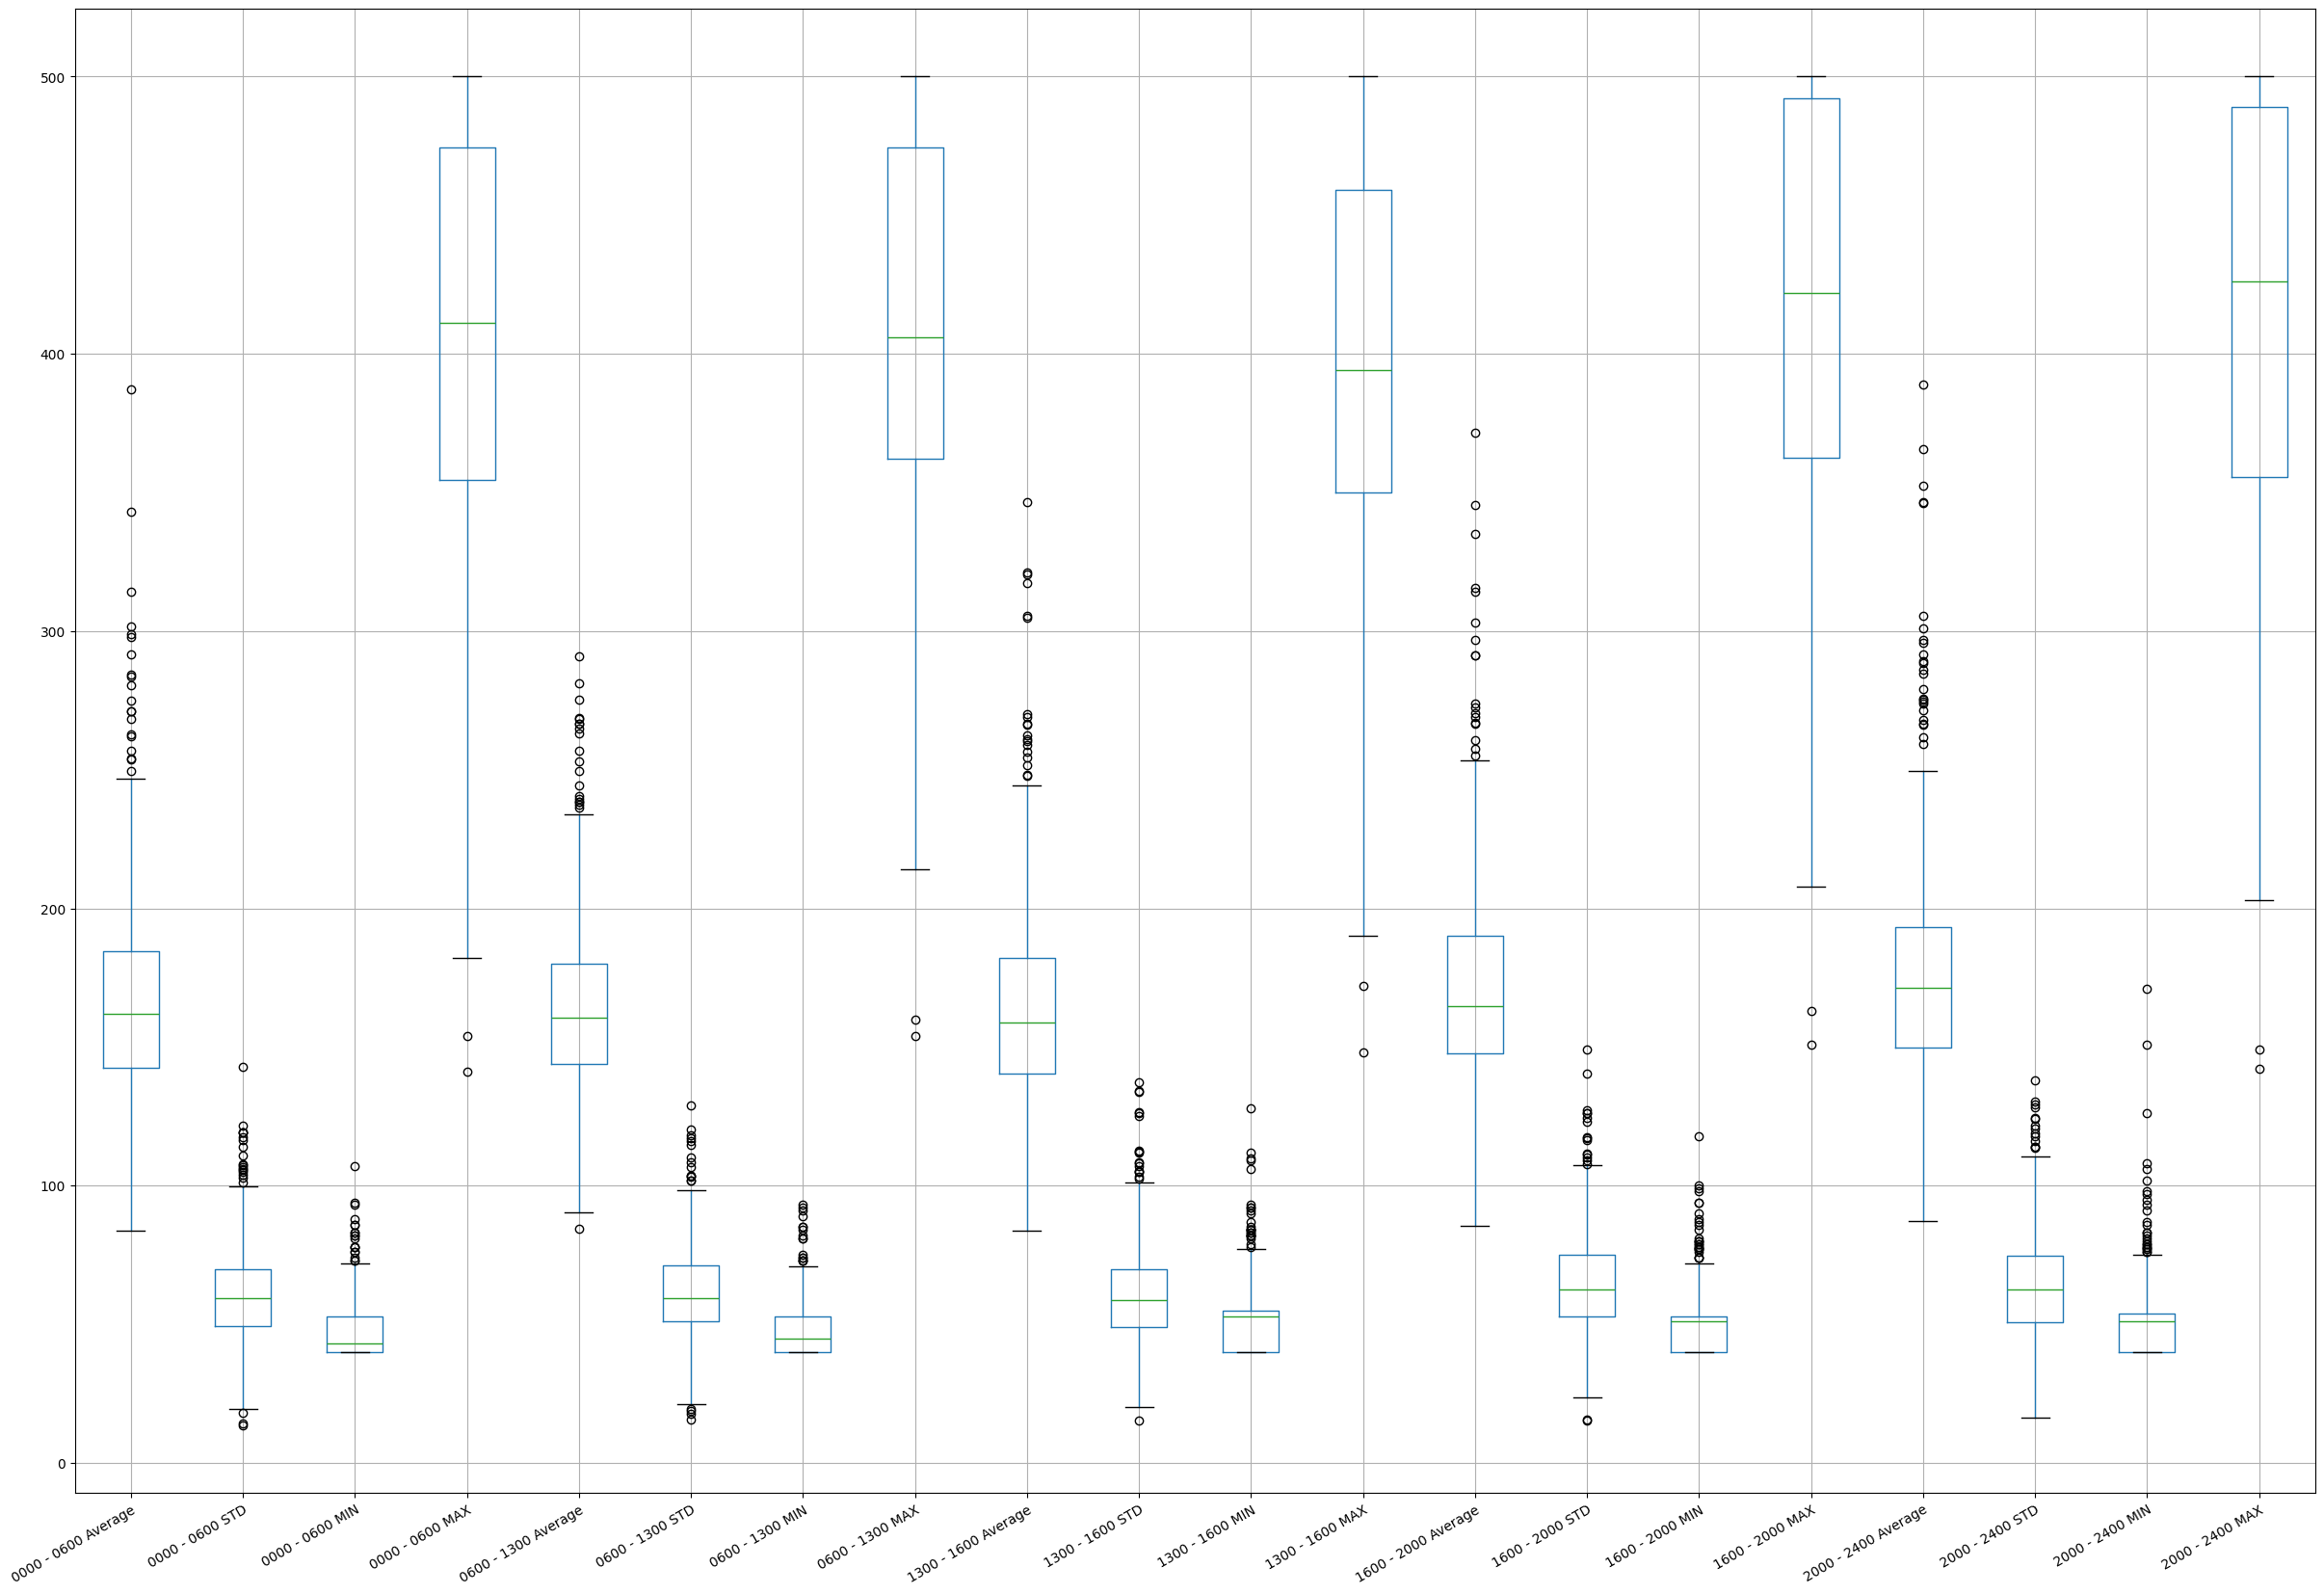

In [32]:
ax = df_with_outliers_no_std[var_to_clustering_process].boxplot(figsize=(30, 20))
ticks = ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

In [103]:
len(var_to_clustering_process)

20

In [104]:
df_no_std_V1 = df_with_outliers_no_std.copy()

column_to_analyze = var_to_clustering_process

initial_shape = df_no_std_V1.shape

counter = 0

for col in column_to_analyze:

    Q1 = np.percentile(df_no_std_V1[col], 25, method ='midpoint')

    Q3 = np.percentile(df_no_std_V1[col], 75, method ='midpoint')

    IQR = Q3 - Q1

    print("Old Shape: ", df_no_std_V1.shape)

    # Upper bound
    upper = np.where(df_no_std_V1[col] >= (Q3 + 1.5 * IQR))
    # Lower bound
    lower = np.where(df_no_std_V1[col] <= (Q1 - 1.5 * IQR))

    df_no_std_V1.drop(upper[0], inplace = True)
    df_no_std_V1.drop(lower[0], inplace = True)

    df_no_std_V1.reset_index(inplace=True, drop=True)

    if upper[0].size == 0 and lower[0].size == 0: # No outliers found in the current iteration
        end_flag = True
    else: # Outliers found in the current iteration
        end_flag = False

    print("New Shape: ", df_no_std_V1.shape)
    print('----- End of '+ col +' iteration ' + '----------')
    print()
    
    counter += 1

    
final_shape = df_no_std_V1.shape

print()
print('----FINISH OUTLIERS PROCESS ------')
print('Initial shape: ', initial_shape, '. Percentage: ', 100)
print('Final shape: ', final_shape, '. Percentage kept: ', final_shape[0]/initial_shape[0]*100, '. Percentage loose: ', 100 - (final_shape[0]/initial_shape[0]*100))
print('Number of iterations: ', counter)

Old Shape:  (731, 37)
New Shape:  (711, 37)
----- End of 0000 - 0600 Average iteration ----------

Old Shape:  (711, 37)
New Shape:  (694, 37)
----- End of 0000 - 0600 STD iteration ----------

Old Shape:  (694, 37)
New Shape:  (678, 37)
----- End of 0000 - 0600 MIN iteration ----------

Old Shape:  (678, 37)
New Shape:  (678, 37)
----- End of 0000 - 0600 MAX iteration ----------

Old Shape:  (678, 37)
New Shape:  (666, 37)
----- End of 0600 - 1300 Average iteration ----------

Old Shape:  (666, 37)
New Shape:  (660, 37)
----- End of 0600 - 1300 STD iteration ----------

Old Shape:  (660, 37)
New Shape:  (652, 37)
----- End of 0600 - 1300 MIN iteration ----------

Old Shape:  (652, 37)
New Shape:  (652, 37)
----- End of 0600 - 1300 MAX iteration ----------

Old Shape:  (652, 37)
New Shape:  (644, 37)
----- End of 1300 - 1600 Average iteration ----------

Old Shape:  (644, 37)
New Shape:  (638, 37)
----- End of 1300 - 1600 STD iteration ----------

Old Shape:  (638, 37)
New Shape:  (620

In [122]:
df_no_std_V2 = df_with_outliers_no_std.copy()

columns_group = [average_variables, STD_variables, MIN_variables, MAX_variables]

initial_shape = df_no_std_V2.shape

for current_group in columns_group:

    intersection = np.array([])

    print()
    print('-------- Group: ', current_group, '------------------------')

    for col in current_group:

        Q1 = np.percentile(df_no_std_V2[col], 25, method ='midpoint')

        Q3 = np.percentile(df_no_std_V2[col], 75, method ='midpoint')

        IQR = Q3 - Q1

        # Upper bound
        upper = np.where(df_no_std_V2[col] >= (Q3 + 1.5 * IQR))
        print('Variable -> ', col)
        print('UPPER')
        print(upper[0])
        # Lower bound
        lower = np.where(df_no_std_V2[col] <= (Q1 - 1.5 * IQR))
        print('LOWER')
        print(lower[0])
        union = np.union1d(upper[0], lower[0])
        print('UNION')
        print(union)
        if intersection.size == 0: # no intersection before
            intersection = union
        else:
            intersection = np.intersect1d(intersection, union)
        print('INTERSECTION')
        print(intersection)
        print('-----------End-------------')
        print()

    print("New Shape: ", df_no_std_V2.shape)
    print('----- End of group'+ str(current_group) + ' iteration ' + '----------')
    print()

    df_no_std_V2.drop(intersection, inplace = True)


    df_no_std_V2.reset_index(inplace=True, drop=True)

    final_shape = df_no_std_V2.shape

print()
print('----FINISH OUTLIERS PROCESS ------')
print('Initial shape: ', initial_shape, '. Percentage: ', 100)
print('Final shape: ', final_shape, '. Percentage kept: ', final_shape[0]/initial_shape[0]*100, '. Percentage loose: ', 100 - (final_shape[0]/initial_shape[0]*100))


-------- Group:  ['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average'] ------------------------
Variable ->  0000 - 0600 Average
UPPER
[ 39  41  52  65 195 231 292 327 374 377 404 405 532 564 573 577 587 600
 648 687]
LOWER
[]
UNION
[ 39  41  52  65 195 231 292 327 374 377 404 405 532 564 573 577 587 600
 648 687]
INTERSECTION
[ 39  41  52  65 195 231 292 327 374 377 404 405 532 564 573 577 587 600
 648 687]
-----------End-------------

Variable ->  0600 - 1300 Average
UPPER
[ 39  65  95 142 192 195 206 227 261 374 377 404 405 541 569 577 600 648
 689]
LOWER
[431]
UNION
[ 39  65  95 142 192 195 206 227 261 374 377 404 405 431 541 569 577 600
 648 689]
INTERSECTION
[ 39  65 195 374 377 404 405 577 600 648]
-----------End-------------

Variable ->  1300 - 1600 Average
UPPER
[ 33  39  52 142 195 208 231 296 347 404 405 453 495 577 600 648 702 709
 713]
LOWER
[]
UNION
[ 33  39  52 142 195 208 231 296 347 404 405 453 495 577 600

In [123]:
df_no_std_V1.describe()

,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,0600 - 1300 Hypo,0600 - 1300 Hyper,0600 - 1300 Average,0600 - 1300 STD,...,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,...,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,580.000000,404.000000,591.000000,591.000000
mean,451.306261,2786.685279,160.463317,59.005669,45.619289,405.658206,527.900169,3324.692047,158.723915,59.451801,...,167.778643,61.945237,48.179357,413.661591,44.446701,0.519459,118.017241,3.264851,1983.722504,13492.524535
std,675.621549,2496.055437,27.122715,13.244108,6.811424,67.717196,701.306458,2911.018197,22.184625,12.516987,...,27.574079,14.509065,7.554210,67.809858,15.276662,0.500044,85.066040,2.648405,2635.214019,11536.829592
min,0.000000,12.000000,97.102428,20.967242,40.000000,219.000000,0.000000,29.000000,96.285578,22.542797,...,100.544019,23.565047,40.000000,219.000000,15.000000,0.000000,4.000000,1.000000,20.000000,348.000000
25%,69.500000,960.000000,141.294577,49.799503,40.000000,355.000000,82.000000,1165.000000,142.475069,51.175061,...,148.048913,51.209197,40.000000,361.000000,32.000000,0.000000,74.000000,1.000000,341.000000,4955.500000
50%,227.000000,2005.000000,158.837287,58.630894,40.000000,408.000000,275.000000,2658.000000,156.822812,58.660418,...,165.225585,61.559465,49.000000,421.000000,44.000000,1.000000,105.000000,2.000000,1007.000000,10844.000000
75%,546.500000,4178.000000,177.861781,67.754632,52.000000,462.000000,712.000000,4563.000000,174.856831,68.912684,...,186.444723,71.398507,53.000000,472.000000,56.000000,1.000000,133.250000,4.000000,2665.000000,19182.000000
max,9056.000000,18259.000000,243.474412,98.412749,70.000000,500.000000,5475.000000,20705.000000,220.142238,96.882431,...,236.709130,100.379198,72.000000,500.000000,85.000000,1.000000,846.000000,17.000000,29387.000000,84352.000000


In [124]:
df_no_std_V2.describe()

,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,0600 - 1300 Hypo,0600 - 1300 Hyper,0600 - 1300 Average,0600 - 1300 STD,...,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,...,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,704.000000,498.00000,716.000000,716.000000
mean,406.155028,2653.909218,165.203829,60.405095,47.206704,405.465084,473.117318,3167.053073,163.274451,60.822896,...,173.492264,63.646165,50.427374,413.248603,45.287709,0.509777,121.184659,3.46988,1775.981844,12850.488827
std,650.930570,2626.461156,34.120064,16.304926,9.460363,73.390079,679.547735,3016.836083,27.848058,15.210971,...,35.054841,17.598735,12.212983,73.268237,15.691819,0.500254,88.193083,2.95644,2547.862851,12054.103179
min,0.000000,1.000000,85.549168,18.025347,40.000000,182.000000,0.000000,18.000000,92.417707,17.759436,...,87.161853,23.565047,40.000000,203.000000,15.000000,0.000000,4.000000,1.00000,0.000000,150.000000
25%,45.000000,691.750000,142.185631,49.365903,40.000000,354.000000,52.750000,964.750000,143.891638,50.945283,...,149.659244,50.847481,40.000000,355.000000,32.750000,0.000000,75.000000,1.00000,252.000000,4106.250000
50%,174.000000,1836.500000,161.472387,59.245324,43.000000,409.000000,213.000000,2303.500000,160.058967,59.215966,...,170.931656,62.386042,51.000000,423.000000,45.000000,1.000000,107.000000,3.00000,797.000000,9587.000000
75%,499.000000,3923.750000,183.325046,69.265126,53.000000,471.000000,614.000000,4411.250000,179.230902,70.703467,...,192.590846,74.485395,54.000000,487.000000,57.000000,1.000000,136.250000,4.00000,2337.250000,18432.500000
max,9056.000000,18353.000000,387.197958,121.579915,107.000000,500.000000,5475.000000,20705.000000,281.177831,117.132444,...,388.924242,129.176119,171.000000,500.000000,86.000000,1.000000,846.000000,24.00000,29387.000000,84352.000000


## Standardize dataset version without outliers

In [125]:
# Standardize the variables
scaler_ = StandardScaler()

# V1
df_std_V1 = df_no_std_V1.copy() # copy to df_to_stand a copy of the dataframe's columns to standardize
arr_std = scaler_.fit_transform(df_std_V1[var_to_clustering_process])

# Create a standardized dataframe with the same index and columns names
df_std_V1 = pd.DataFrame(data=arr_std, columns=df_no_std_V1[var_to_clustering_process].columns)
df_std_V1.insert(loc=0, value=df_no_std_V1[id_variable], column='ID')

#V2
df_std_V2 = df_no_std_V2.copy() # copy to df_to_stand a copy of the dataframe's columns to standardize
arr_std = scaler_.fit_transform(df_std_V2[var_to_clustering_process])

# Create a standardized dataframe with the same index and columns names
df_std_V2 = pd.DataFrame(data=arr_std, columns=df_no_std_V1[var_to_clustering_process].columns)
df_std_V2.insert(loc=0, value=df_no_std_V1[id_variable], column='ID')

### Mean = 0, Std = 1

In [126]:
df_std_V1.describe().round(decimals=2)

,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,0600 - 1300 Average,0600 - 1300 STD,0600 - 1300 MIN,0600 - 1300 MAX,1300 - 1600 Average,1300 - 1600 STD,1300 - 1600 MIN,1300 - 1600 MAX,1600 - 2000 Average,1600 - 2000 STD,1600 - 2000 MIN,1600 - 2000 MAX,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX
count,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00,591.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.34,-2.87,-0.83,-2.76,-2.82,-2.95,-0.91,-2.81,-2.43,-2.75,-1.26,-2.59,-2.27,-2.72,-1.11,-2.72,-2.44,-2.65,-1.08,-2.87
25%,-0.71,-0.70,-0.83,-0.75,-0.73,-0.66,-0.91,-0.72,-0.77,-0.67,-1.26,-0.65,-0.71,-0.70,-1.11,-0.73,-0.72,-0.74,-1.08,-0.78
50%,-0.06,-0.03,-0.83,0.03,-0.09,-0.06,-0.45,-0.07,-0.08,-0.02,0.27,-0.03,-0.13,-0.07,0.26,0.05,-0.09,-0.03,0.11,0.11
75%,0.64,0.66,0.94,0.83,0.73,0.76,1.05,0.81,0.68,0.64,0.53,0.72,0.68,0.65,0.67,0.92,0.68,0.65,0.64,0.86
max,3.06,2.98,3.58,1.39,2.77,2.99,3.76,1.46,3.10,2.62,2.95,1.54,2.99,2.66,3.14,1.28,2.50,2.65,3.16,1.27


In [127]:
df_std_V2.describe().round(decimals=2)

,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,0600 - 1300 Average,0600 - 1300 STD,0600 - 1300 MIN,0600 - 1300 MAX,1300 - 1600 Average,1300 - 1600 STD,1300 - 1600 MIN,1300 - 1600 MAX,1600 - 2000 Average,1600 - 2000 STD,1600 - 2000 MIN,1600 - 2000 MAX,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX
count,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.34,-2.60,-0.76,-3.05,-2.55,-2.83,-0.85,-2.84,-2.55,-2.36,-1.08,-2.84,-2.64,-2.43,-0.96,-2.99,-2.46,-2.28,-0.85,-2.87
25%,-0.68,-0.68,-0.76,-0.70,-0.70,-0.65,-0.85,-0.68,-0.72,-0.69,-1.08,-0.64,-0.69,-0.69,-0.96,-0.78,-0.68,-0.73,-0.85,-0.80
50%,-0.11,-0.07,-0.44,0.05,-0.12,-0.11,-0.26,-0.05,-0.12,-0.08,0.11,-0.03,-0.17,-0.12,0.13,0.06,-0.07,-0.07,0.05,0.13
75%,0.53,0.54,0.61,0.89,0.57,0.65,0.68,0.90,0.62,0.57,0.29,0.79,0.61,0.57,0.32,1.05,0.55,0.62,0.29,1.01
max,6.51,3.75,6.32,1.29,4.24,3.70,5.25,1.33,5.16,4.02,6.95,1.42,4.19,3.74,6.73,1.20,6.15,3.73,9.88,1.18


# Functions

In [128]:
def create_centroids(df : pd.DataFrame, labels : np.ndarray, k : int) -> pd.DataFrame:
    """
    Calcalulate the centroids given a dataset and the labels of classification

    :param df: DataFrame with the atributtes to make the centroids
    :param labels: labels created in the clustering process
    :param k: number of cluster in the labels
    :return: DataFrame with the centroids
    """
    aux_df = df.copy() # Create a copy of the dataset given to keep it unmodified
    aux_s = pd.Series(data=labels)
    aux_df['Labels'] = aux_s # Add the labels to aux_df
    attribute_Total = df.shape[1] # Number of attribute in the dataframe
    centroids_df_list = []  # List to store DataFrames for centroids

    for k_th in range(0, k): # For every group made in the current clustering methods
        filter_ = (aux_df['Labels'] == k_th) ## Filter where the label of the current clustering methods
        aux_series_ = pd.Series(index=df.columns, dtype=float)
        for n_th_attribute in range(0, attribute_Total): # Move through all attributes
            aux_series_[n_th_attribute] = aux_df[filter_].iloc[:, n_th_attribute].mean(axis=0) # Find the average of the column
            
        centroids_df_list.append(aux_series_.to_frame().T)  # Convert series to DataFrame and append

    centroids_df_ = pd.concat(centroids_df_list, ignore_index=True)  # Combine all DataFrames

    return centroids_df_

In [129]:
def my_value_count(df:pd.DataFrame):
    """"
    Print all Value count of a dataframe with miss values included
    """
    for current_col in df.columns:
        print(df[current_col].value_counts(dropna=False))
        print('---------------------')
        print()

In [130]:
def _color_green(val):
    """
    Function from internet to colored the consensus matrix.
    :param val:
    :return:
    """
    color = 'green' if 0.9 < val < 1 else 'gray'
    return 'color: %s' % color

In [131]:
def plot_dendrogram(model, **kwargs):
    """
    Internet function to create a dendogram from sklearn library hierarchical clustering
    :param model:
    :param kwargs:
    :return:
    """
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [132]:
def get_dataset_number(name:str) -> int:
    """
    Extract from the name of the model instance the number of the dataset used.
    :param name: Name of the model instance
    :return: integer representing the dataset used in training the instance.
    """
    return int(name[len(name) - 1])

In [133]:
def get_k(name:str) -> int:
    """
    Extract from the name of the model instance the number of the K used.
    :param name: Name of the model instance
    :return: integer representing the K used in training the instance.
    """
    return int(name[len(name) - 11])

In [134]:
def get_df_by_label (k_value:int, df:pd.DataFrame) -> pd.DataFrame:
    """
    Given a dataset with all the labels of all the instance executed of all clustering methods pick the results with
    determined K.
    :param df: Datafreme to extrat the columns with K grups
    :param k_value: the k value of the dataset that want to form
    :return: a dataframe with the labels correspondent to the models instances with :param k_value
    """
    columns_ = df.iloc[:, variable_number + 1:].columns
    selected_columns = []
    for column in columns_:
        current_K = get_k(column)
        if current_K == k_value: # Column to be add
            selected_columns.append(column)

    return df[selected_columns]

In [135]:
def get_best_model_of_set(X:pd.DataFrame, df_labels_:pd.DataFrame) -> (str, int):
    """
    Given a dataset with the characteristics (attributes) and a group of labels (from the result of the clustering
    methods) return the best model based on the silhouette average score.
    :param X: dataset with the characteristics
    :param df_labels_: set of models´ result labels
    :return: an string with the name of the best model
    """
    models_name = df_labels_.columns

    best_model = models_name[0]
    best_model_score = silhouette_score(X=X, labels=df_labels_[best_model])

    for index in range(1, models_name.size):
        temp_model = models_name[index]
        temp_model_score = silhouette_score(X=X, labels=df_labels_[temp_model])

        if temp_model_score > best_model_score:
            best_model = temp_model
            best_model_score = temp_model_score

    return best_model, best_model_score

# Estimating the number of clusters (K)

## Using Dendrogram analysis

### Using original data V1 (***not standardize without outliers***)

In [180]:
# Creating distance matrix
hier_no_std_v1 = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hier_no_std_v1.fit(df_no_std_V1[var_to_clustering_process])

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**Dendrogram for ward method**

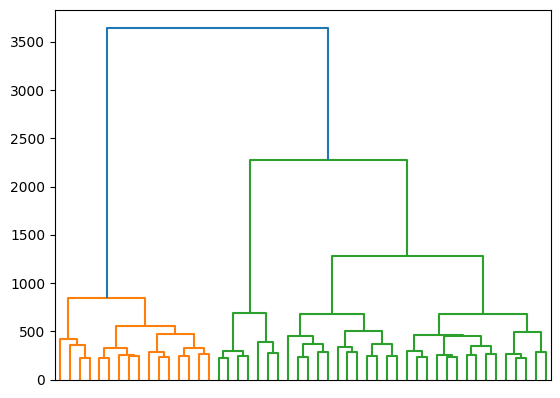

In [183]:
# plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hier_no_std_v1, no_labels=True, truncate_mode='lastp', p=50)
plt.savefig('dendo/dendrogram_V1_0.png', bbox_inches='tight')  # Guardar como PNG
plt.savefig('dendo/dendrogram_V1_0.eps', bbox_inches='tight') 
plt.show()

### Using original data V2 (not standardize without outliers)

In [185]:
# Creating distance matrix
hier_no_std_v2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hier_no_std_v2.fit(df_no_std_V2[var_to_clustering_process])

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**Dendrogram for ward method**

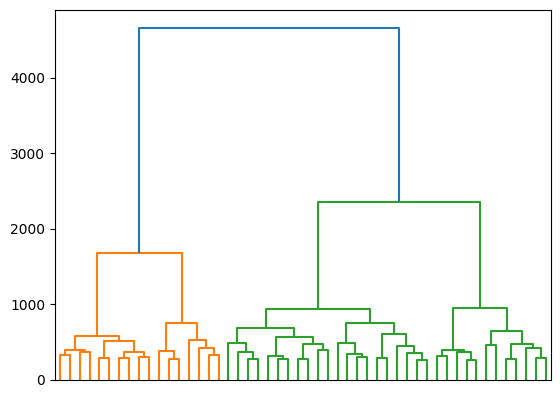

In [186]:
# plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hier_no_std_v2, no_labels=True, truncate_mode='lastp', p=50)
plt.savefig('dendo/dendrogram_V2_0.png', bbox_inches='tight')  # Guardar como PNG
plt.savefig('dendo/dendrogram_V2_0.eps', bbox_inches='tight') 
plt.show()

### Using standardize data V1 (standardize without outliers)

In [187]:
# Creating distance matrices 
hier_std_V1 = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hier_std_V1.fit(df_std_V1[var_to_clustering_process])

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**Dendrogram for ward method**

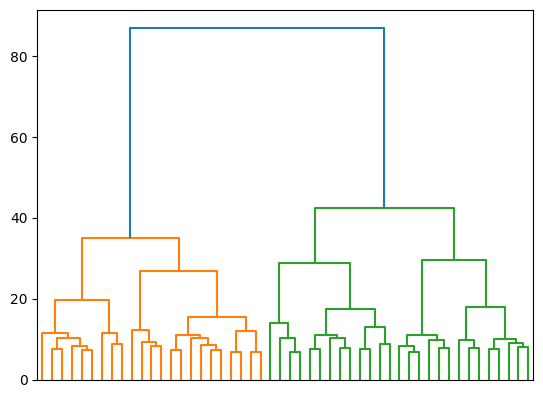

In [188]:
# plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hier_std_V1, no_labels=True, truncate_mode='lastp', p=50)
plt.savefig('dendo/dendrogram_V1_1.png', bbox_inches='tight')  # Guardar como PNG
plt.savefig('dendo/dendrogram_V1_1.eps', bbox_inches='tight') 
plt.show()

### Using standardize data V2 (standardize without outliers)

In [189]:
# Creating distance matrices
hier_std_V2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hier_std_V2.fit(df_std_V1[var_to_clustering_process])

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**Dendrogram for ward method**

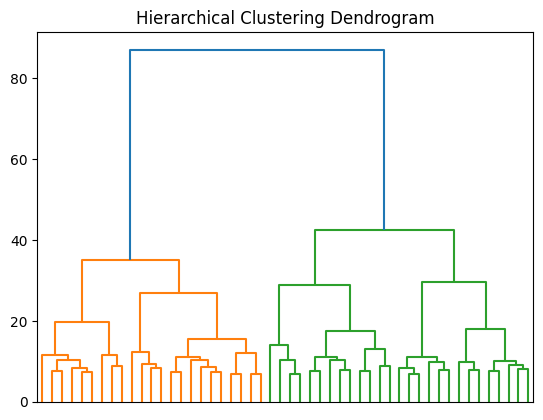

In [190]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hier_std_V2, no_labels=True, truncate_mode='lastp', p=50)
plt.savefig('dendo/dendrogram_V2_1.png', bbox_inches='tight')  # Guardar como PNG
plt.savefig('dendo/dendrogram_V2_1.eps', bbox_inches='tight') 
plt.show()

### Conclusions of Hierarchical Clustering

Analysing the results of the Hierarchical clustering the conclusion is to use between 2 y 8 clusters.

## Using the elbow method V1

In [192]:
wcss_v1 = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(df_no_std_V1[var_to_clustering_process])
    wcss_v1.append(kmeans.inertia_)

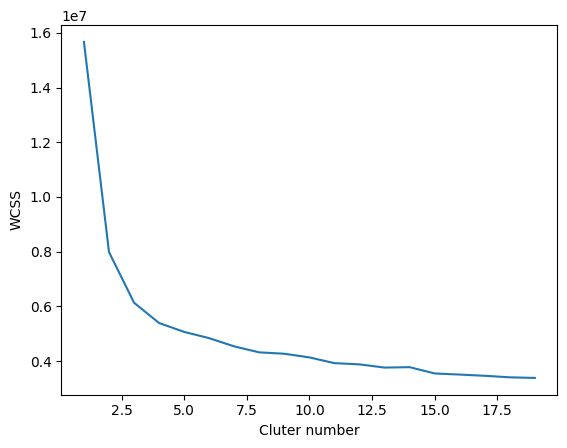

In [193]:
# Elbow method graph
plt.plot(range(1, 20), wcss_v1)
# plt.title('Elbow method')
plt.xlabel('Cluter number')
plt.ylabel('WCSS')
plt.savefig('dendo/elbow_V1_0.png', bbox_inches='tight')  # Guardar como PNG
plt.savefig('dendo/elbow_V1_0.eps', bbox_inches='tight') 
plt.show()

In [194]:
wcss_v2 = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(df_no_std_V2[var_to_clustering_process])
    wcss_v2.append(kmeans.inertia_)

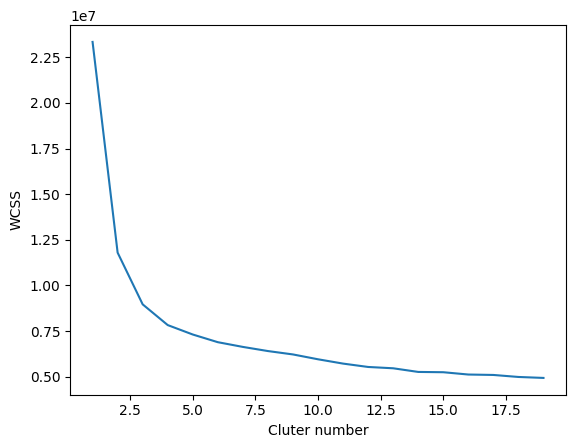

In [195]:
# Elbow method graph
plt.plot(range(1, 20), wcss_v2)
# plt.title('Elbow method')
plt.xlabel('Cluter number')
plt.ylabel('WCSS')
plt.savefig('dendo/elbow_V2_0.png', bbox_inches='tight')  # Guardar como PNG
plt.savefig('dendo/elbow_V2_0.eps', bbox_inches='tight') 
plt.show()

## Conclusions of elbow method

Use K between 2 and 5.

# Clustering

## Selected methods selected

Agglomerative Hierarchical, KMeans, Gaussian mixtures, BIRCH, and Fuzzy c means

## Datasets selected
Four version of the dataset, one not standardized and other standardize and both version of the outliers' removal.

In [148]:
datasets_V1 = [df_no_std_V1, df_std_V1] # Datasets to use for version 1 of outliers elimination
datasets_V2 = [df_no_std_V2, df_std_V2] # Datasets to use for version 2 of outliers elimination

k_values = [2, 3, 4, 5, 6, 7, 8] # variation of the number of clusters

data_size_V1 = len(datasets_V1)
data_size_V2 = len(datasets_V2)

#  Dataset with the original data (no standardized), with the labels of all clustering
df_no_std_labeled_V1 = df_no_std_V1.copy()
df_no_std_labeled_V2 = df_no_std_V2.copy()

In [149]:
df_no_std_V1

,Patient_ID,0000 - 0600 Hypo,0000 - 0600 Hyper,0000 - 0600 Average,0000 - 0600 STD,0000 - 0600 MIN,0000 - 0600 MAX,0600 - 1300 Hypo,0600 - 1300 Hyper,0600 - 1300 Average,...,2000 - 2400 Average,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper
0,LIB193263,361,7110,176.087421,59.873722,40.0,492.0,483,6559,163.887377,...,184.284987,63.213750,40.0,459.0,57.0,0,NaN,1.0,1604,30204
1,LIB193264,428,2333,160.231695,65.464480,40.0,372.0,501,2994,162.900101,...,140.503562,57.586750,41.0,353.0,47.0,1,NaN,3.0,2146,10406
2,LIB193265,2408,1493,119.460091,61.743540,40.0,500.0,2123,3597,142.428591,...,135.097479,66.939892,41.0,500.0,42.0,1,120.0,NaN,8581,11408
3,LIB193266,357,3751,154.638206,57.571690,40.0,462.0,229,4222,147.812757,...,167.311661,60.369626,40.0,462.0,24.0,0,74.0,2.0,1047,18428
4,LIB193267,390,6230,182.237126,75.258731,40.0,500.0,247,6225,167.054926,...,199.350390,76.526081,53.0,488.0,42.0,1,177.0,1.0,1091,28622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,LIB194162,751,2200,146.611417,65.142357,48.0,431.0,609,3340,159.443249,...,157.267522,61.212698,45.0,428.0,23.0,0,12.0,NaN,2800,11831
587,LIB194163,227,1335,153.449737,63.242676,40.0,427.0,363,1533,150.834321,...,148.118989,55.314128,53.0,417.0,38.0,0,64.0,NaN,1125,6172
588,LIB194164,901,3841,147.788886,56.172238,43.0,374.0,1198,4553,144.274455,...,157.706303,50.482120,49.0,342.0,31.0,1,158.0,1.0,3677,19642
589,LIB194165,222,3473,195.923716,73.126044,46.0,458.0,214,3390,181.424242,...,158.545629,68.050734,40.0,403.0,36.0,1,22.0,NaN,1072,13652


## Agglomerative Hierarchical clustering

In [150]:
for k in k_values:
    # Dataset V1
    for d in range(0, data_size_V1):
        if d == 0: # no std data
            std_str = 'no_std'
        else: # std data
            std_str = 'std'

        hier = AgglomerativeClustering(n_clusters=k) # Create method
        hier.fit(datasets_V1[d][var_to_clustering_process]) # Train method
        df_no_std_labeled_V1['Hier_K' + str(k) + '_data_V1_' + str(d)] = hier.labels_ # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

    # Dataset V2
    for d in range(0, data_size_V2):
        if d == 0: # no std data
            std_str = 'no_std'
        else: # std data
            std_str = 'std'

        hier = AgglomerativeClustering(n_clusters=k) # Create method
        hier.fit(datasets_V2[d][var_to_clustering_process]) # Train method
        df_no_std_labeled_V2['Hier_K' + str(k) + '_data_V2_' + str(d)] = hier.labels_ # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version


## KMeans

In [151]:
for k in k_values:
    # Dataset V1
    for d in range(0, data_size_V1):
        if d == 0: # no std data
            std_str = 'no_std'
        else: # std data
            std_str = 'std'

        kmeans_clustering = KMeans(n_clusters=k) # Create method
        kmeans_clustering.fit(datasets_V1[d][var_to_clustering_process]) # Train method
        df_no_std_labeled_V1['Kmeans_K' + str(k) + '_data_V1_' + str(d)] = kmeans_clustering.labels_ # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

     # Dataset V1
    for d in range(0, data_size_V2):
        if d == 0: # no std data
            std_str = 'no_std'
        else: # std data
            std_str = 'std'

        kmeans_clustering = KMeans(n_clusters=k) # Create method
        kmeans_clustering.fit(datasets_V2[d][var_to_clustering_process]) # Train method
        df_no_std_labeled_V2['Kmeans_K' + str(k) + '_data_V2_' + str(d)] = kmeans_clustering.labels_ # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

## Finding difference between standardize and not standardize data

In order to decide if it is necessary to standardize the data, the clustering made by the past two methods
(Agglomerative Hierarchical clustering and kmeans clustering) are compared to find out how different are its results.
For that the rand index will be used.

**Rand index.**

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting
pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is:

RI = (number of agreeing pairs) / (number of pairs)

Returns
float
Similarity score between 0.0 and 1.0, inclusive, 1.0 stands for perfect match.

### Consensus matrix V1 dataset

In [171]:
# Matrix of the size of all clustering made
cm_df = pd.DataFrame(columns=df_no_std_labeled_V1.iloc[[1, 2], variable_number + 1:].columns,
                     index=df_no_std_labeled_V1.iloc[[1, 2], variable_number + 1:].columns)

# Move through the matrix (diagonal superior)
for row_index in range(0, cm_df.shape[1]):
    row_cluster_name = cm_df.iloc[:, row_index].name
    row_cluster = df_no_std_labeled_V1[row_cluster_name]
    for column_index in range (row_index, cm_df.shape[1]):
        column_cluster_name = cm_df.iloc[:, column_index].name
        column_cluster = df_no_std_labeled_V1[column_cluster_name]
        cm_df.iloc[row_index,column_index] = (rand_score(row_cluster, column_cluster)) # Calculate the rand index

cm_df.style.applymap(_color_green)

C:\Users\Ciro\AppData\Local\Temp\ipykernel_22568\4090050502.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  cm_df.style.applymap(_color_green)


,Hier_K2_data_V1_0,Hier_K2_data_V1_1,Hier_K3_data_V1_0,Hier_K3_data_V1_1,Hier_K4_data_V1_0,Hier_K4_data_V1_1,Hier_K5_data_V1_0,Hier_K5_data_V1_1,Hier_K6_data_V1_0,Hier_K6_data_V1_1,Hier_K7_data_V1_0,Hier_K7_data_V1_1,Hier_K8_data_V1_0,Hier_K8_data_V1_1,Kmeans_K2_data_V1_0,Kmeans_K2_data_V1_1,Kmeans_K3_data_V1_0,Kmeans_K3_data_V1_1,Kmeans_K4_data_V1_0,Kmeans_K4_data_V1_1,Kmeans_K5_data_V1_0,Kmeans_K5_data_V1_1,Kmeans_K6_data_V1_0,Kmeans_K6_data_V1_1,Kmeans_K7_data_V1_0,Kmeans_K7_data_V1_1,Kmeans_K8_data_V1_0,Kmeans_K8_data_V1_1
Hier_K2_data_V1_0,1.000000,0.739023,0.843586,0.610537,0.712696,0.594878,0.656945,0.553581,0.645611,0.531383,0.608409,0.538031,0.585466,0.533351,0.669827,0.698655,0.744885,0.634024,0.656973,0.597235,0.595474,0.561553,0.599776,0.547747,0.567805,0.540629,0.567117,0.523393
Hier_K2_data_V1_1,nan,1.000000,0.669334,0.860994,0.665606,0.757211,0.617081,0.708457,0.605747,0.686260,0.606757,0.649041,0.588035,0.632040,0.785666,0.873584,0.682492,0.745413,0.652121,0.618825,0.628455,0.634237,0.617202,0.626098,0.607451,0.595670,0.591654,0.596673
Hier_K3_data_V1_0,nan,nan,1.000000,0.709822,0.869110,0.694164,0.813359,0.658465,0.802025,0.657134,0.764823,0.663782,0.741880,0.659101,0.640403,0.645485,0.853807,0.658172,0.783366,0.712398,0.723049,0.674559,0.728349,0.668347,0.697330,0.662032,0.710935,0.663610
Hier_K3_data_V1_1,nan,nan,nan,1.000000,0.749491,0.896217,0.700966,0.847463,0.692248,0.825266,0.694921,0.788047,0.693281,0.771046,0.735324,0.775153,0.757097,0.733029,0.724741,0.724873,0.711457,0.727460,0.696338,0.727936,0.696934,0.692116,0.695741,0.715455
Hier_K4_data_V1_0,nan,nan,nan,nan,1.000000,0.735094,0.944248,0.741254,0.932915,0.740646,0.895713,0.747352,0.872770,0.742671,0.690269,0.665617,0.825105,0.714130,0.868600,0.748132,0.811345,0.745304,0.832866,0.742568,0.811609,0.747082,0.828449,0.756827
Hier_K4_data_V1_1,nan,nan,nan,nan,nan,1.000000,0.740256,0.951246,0.731538,0.929049,0.741415,0.891829,0.739775,0.874829,0.650756,0.687625,0.735920,0.707150,0.721713,0.753529,0.735146,0.787754,0.741570,0.790249,0.748040,0.772027,0.751080,0.799736
Hier_K5_data_V1_0,nan,nan,nan,nan,nan,nan,1.000000,0.746417,0.988666,0.745809,0.951464,0.770501,0.928521,0.779919,0.634518,0.619157,0.776581,0.687608,0.843821,0.748613,0.822461,0.763968,0.864929,0.767174,0.848410,0.779512,0.863759,0.789980
Hier_K5_data_V1_1,nan,nan,nan,nan,nan,nan,nan,1.000000,0.737698,0.977803,0.755835,0.940583,0.765333,0.923583,0.644733,0.663088,0.715444,0.724013,0.724569,0.765230,0.749371,0.810307,0.757045,0.809108,0.770019,0.806315,0.770317,0.836996
Hier_K6_data_V1_0,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,0.747025,0.962798,0.771717,0.939855,0.781135,0.623184,0.607824,0.765247,0.679761,0.840770,0.739895,0.821589,0.761536,0.861877,0.770478,0.847102,0.778457,0.870160,0.791471
Hier_K6_data_V1_1,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,0.765161,0.962781,0.775290,0.945780,0.622536,0.640890,0.703215,0.716269,0.726324,0.757452,0.753099,0.814953,0.758949,0.822151,0.774137,0.814104,0.776397,0.855017


In [172]:
result = []
df = cm_df.copy()
# Recorremos las filas del DataFrame que terminan en '_0'
for index_0 in df.index:
    if index_0.endswith('_0'):
        # Reemplazamos '_0' con '_1' para encontrar su versión correspondiente
        index_1 = index_0.replace('_0', '_1')
        
        if index_1 in df.columns:
            # Extraemos el valor de similitud entre el index_0 y el index_1
            similarity_value = df.loc[index_0, index_1]
            
            # Agregamos a la lista la tupla (index_0, index_1, similarity_value)
            result.append([index_0, index_1, similarity_value])

# Convertimos el resultado en un DataFrame con tres columnas
result_df_V1 = pd.DataFrame(result, columns=['Group_0', 'Group_1', 'Similarity'])

# Mostramos el DataFrame resultante
result_df_V1

,Group_0,Group_1,Similarity
0,Hier_K2_data_V1_0,Hier_K2_data_V1_1,0.739023
1,Hier_K3_data_V1_0,Hier_K3_data_V1_1,0.709822
2,Hier_K4_data_V1_0,Hier_K4_data_V1_1,0.735094
3,Hier_K5_data_V1_0,Hier_K5_data_V1_1,0.746417
4,Hier_K6_data_V1_0,Hier_K6_data_V1_1,0.747025
5,Hier_K7_data_V1_0,Hier_K7_data_V1_1,0.790175
6,Hier_K8_data_V1_0,Hier_K8_data_V1_1,0.809952
7,Kmeans_K2_data_V1_0,Kmeans_K2_data_V1_1,0.806544
8,Kmeans_K3_data_V1_0,Kmeans_K3_data_V1_1,0.696212
9,Kmeans_K4_data_V1_0,Kmeans_K4_data_V1_1,0.739580


In [173]:
# result_df_V1.to_excel('Tables/result_df_V1.xlsx', index=False)

In [174]:
result_df_V1['Similarity'].mean()

0.7639626684365562

In [175]:
# Matrix of the size of all clustering made
cm_df = pd.DataFrame(columns=df_no_std_labeled_V2.iloc[[1, 2], variable_number + 1:].columns,
                     index=df_no_std_labeled_V2.iloc[[1, 2], variable_number + 1:].columns)

# Move through the matrix (diagonal superior)
for row_index in range(0, cm_df.shape[1]):
    row_cluster_name = cm_df.iloc[:, row_index].name
    row_cluster = df_no_std_labeled_V2[row_cluster_name]
    for column_index in range (row_index, cm_df.shape[1]):
        column_cluster_name = cm_df.iloc[:, column_index].name
        column_cluster = df_no_std_labeled_V2[column_cluster_name]
        cm_df.iloc[row_index,column_index] = (rand_score(row_cluster, column_cluster)) # Calculate the rand index

cm_df.style.applymap(_color_green)

C:\Users\Ciro\AppData\Local\Temp\ipykernel_22568\243219843.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  cm_df.style.applymap(_color_green)


,Hier_K2_data_V2_0,Hier_K2_data_V2_1,Hier_K3_data_V2_0,Hier_K3_data_V2_1,Hier_K4_data_V2_0,Hier_K4_data_V2_1,Hier_K5_data_V2_0,Hier_K5_data_V2_1,Hier_K6_data_V2_0,Hier_K6_data_V2_1,Hier_K7_data_V2_0,Hier_K7_data_V2_1,Hier_K8_data_V2_0,Hier_K8_data_V2_1,Kmeans_K2_data_V2_0,Kmeans_K2_data_V2_1,Kmeans_K3_data_V2_0,Kmeans_K3_data_V2_1,Kmeans_K4_data_V2_0,Kmeans_K4_data_V2_1,Kmeans_K5_data_V2_0,Kmeans_K5_data_V2_1,Kmeans_K6_data_V2_0,Kmeans_K6_data_V2_1,Kmeans_K7_data_V2_0,Kmeans_K7_data_V2_1,Kmeans_K8_data_V2_0,Kmeans_K8_data_V2_1
Hier_K2_data_V2_0,1.000000,0.836981,0.795789,0.721338,0.735219,0.690081,0.698058,0.686604,0.631711,0.672657,0.608927,0.586053,0.598801,0.580334,0.823339,0.715049,0.659569,0.635211,0.658229,0.606317,0.631301,0.591890,0.601387,0.569535,0.574810,0.554229,0.574911,0.543505
Hier_K2_data_V2_1,nan,1.000000,0.719405,0.878169,0.665492,0.790655,0.628331,0.787178,0.605801,0.766012,0.602575,0.670039,0.592870,0.655764,0.850904,0.821092,0.663304,0.652526,0.672825,0.615381,0.625698,0.604610,0.608317,0.610071,0.602141,0.606094,0.595468,0.598152
Hier_K3_data_V2_0,nan,nan,1.000000,0.752655,0.939430,0.721397,0.902270,0.723483,0.835922,0.709536,0.813138,0.707692,0.803012,0.701973,0.724327,0.692546,0.768739,0.717674,0.817217,0.732402,0.790272,0.707739,0.770368,0.697683,0.756143,0.714459,0.744095,0.702242
Hier_K3_data_V2_1,nan,nan,nan,1.000000,0.698742,0.912486,0.714494,0.909009,0.699027,0.887842,0.695800,0.791870,0.686096,0.777595,0.759577,0.754018,0.662964,0.691714,0.717967,0.663726,0.723245,0.655276,0.709771,0.714760,0.704352,0.708696,0.682060,0.704973
Hier_K4_data_V2_0,nan,nan,nan,nan,1.000000,0.724499,0.962839,0.726585,0.896492,0.735977,0.873708,0.734156,0.863582,0.740040,0.665351,0.634367,0.781490,0.720862,0.867285,0.745951,0.836129,0.739884,0.825163,0.740626,0.800531,0.757683,0.791905,0.746107
Hier_K4_data_V2_1,nan,nan,nan,nan,nan,1.000000,0.740251,0.996523,0.727206,0.975356,0.725237,0.879384,0.724886,0.865109,0.698176,0.667527,0.672641,0.717729,0.732293,0.696617,0.748814,0.712404,0.760507,0.766152,0.745525,0.770762,0.732226,0.764304
Hier_K5_data_V2_0,nan,nan,nan,nan,nan,nan,1.000000,0.742415,0.933652,0.751807,0.910868,0.762324,0.900742,0.768207,0.628191,0.599926,0.746142,0.717424,0.846798,0.737434,0.856944,0.733992,0.846791,0.766090,0.822346,0.783975,0.799609,0.769586
Hier_K5_data_V2_1,nan,nan,nan,nan,nan,nan,nan,1.000000,0.729371,0.978833,0.727402,0.882861,0.727050,0.868586,0.695394,0.664746,0.671251,0.715642,0.732293,0.700016,0.749088,0.715099,0.760820,0.768965,0.747103,0.774161,0.733617,0.767703
Hier_K6_data_V2_0,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,0.738762,0.977216,0.787940,0.967090,0.794034,0.615474,0.605938,0.747896,0.712646,0.832207,0.749658,0.864254,0.741731,0.855999,0.795300,0.860706,0.813310,0.844876,0.803586
Hier_K6_data_V2_1,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,0.736793,0.904028,0.742388,0.889753,0.674556,0.643907,0.668133,0.701696,0.739794,0.693945,0.758745,0.732500,0.770368,0.779560,0.758378,0.792577,0.749393,0.785807


In [176]:
result = []
df = cm_df.copy()
# Recorremos las filas del DataFrame que terminan en '_0'
for index_0 in df.index:
    if index_0.endswith('_0'):
        # Reemplazamos '_0' con '_1' para encontrar su versión correspondiente
        index_1 = index_0.replace('_0', '_1')
        
        if index_1 in df.columns:
            # Extraemos el valor de similitud entre el index_0 y el index_1
            similarity_value = df.loc[index_0, index_1]
            
            # Agregamos a la lista la tupla (index_0, index_1, similarity_value)
            result.append([index_0, index_1, similarity_value])

# Convertimos el resultado en un DataFrame con tres columnas
result_df_V2 = pd.DataFrame(result, columns=['Group_0', 'Group_1', 'Similarity'])

# Mostramos el DataFrame resultante
result_df_V2

,Group_0,Group_1,Similarity
0,Hier_K2_data_V2_0,Hier_K2_data_V2_1,0.836981
1,Hier_K3_data_V2_0,Hier_K3_data_V2_1,0.752655
2,Hier_K4_data_V2_0,Hier_K4_data_V2_1,0.724499
3,Hier_K5_data_V2_0,Hier_K5_data_V2_1,0.742415
4,Hier_K6_data_V2_0,Hier_K6_data_V2_1,0.738762
5,Hier_K7_data_V2_0,Hier_K7_data_V2_1,0.797926
6,Hier_K8_data_V2_0,Hier_K8_data_V2_1,0.811513
7,Kmeans_K2_data_V2_0,Kmeans_K2_data_V2_1,0.821092
8,Kmeans_K3_data_V2_0,Kmeans_K3_data_V2_1,0.788253
9,Kmeans_K4_data_V2_0,Kmeans_K4_data_V2_1,0.752643


In [178]:
# result_df_V2.to_excel('Tables/result_df_V2.xlsx', index=False)

In [177]:
result_df_V2['Similarity'].mean()

0.7837252133341518

There is difference between the clustering made with the not standardize data and the standardize data, then the decision is to use both dataset versions.

## BIRCH

In [196]:
for k in k_values:
    # Dataset V1
    for d in range(0, data_size_V1):
        birch_clustering = Birch(n_clusters=k)
        birch_clustering.fit(datasets_V1[d][var_to_clustering_process])
        df_no_std_labeled_V1['Birch_K' + str(k) + '_data_V1_' + str(d)] = birch_clustering.labels_ # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

    # Dataset V2
    for d in range(0, data_size_V1):
        birch_clustering = Birch(n_clusters=k)
        birch_clustering.fit(datasets_V2[d][var_to_clustering_process])
        df_no_std_labeled_V2['Birch_K' + str(k) + '_data_V2_' + str(d)] = birch_clustering.labels_ # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

## Gaussian mixtures

In [197]:
covariance_types = ['full']

for k in k_values:
    # Dataset V1
    for d in range(0, data_size_V1):
        gm_clustering = GaussianMixture(n_components=k, max_iter=300)
        gm_clustering.fit(datasets_V1[d][var_to_clustering_process])
        df_no_std_labeled_V1['Gauss_K' + str(k) + '_data_V1_' + str(d)] = gm_clustering.predict(datasets_V1[d][var_to_clustering_process]) # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

    # Dataset V2
    for d in range(0, data_size_V1):
        gm_clustering = GaussianMixture(n_components=k, max_iter=300)
        gm_clustering.fit(datasets_V2[d][var_to_clustering_process])
        df_no_std_labeled_V2['Gauss_K' + str(k) + '_data_V2_' + str(d)] = gm_clustering.predict(datasets_V2[d][var_to_clustering_process]) # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

## Fuzzy c means

***From an open-sourced Python package***

In [198]:
for k in k_values:
    # Dataset V1
    for d in range(0, data_size_V1):
        fcm = FCM(n_clusters=k, max_iter=300)
        fcm.fit(datasets_V1[d][var_to_clustering_process].to_numpy())
        df_no_std_labeled_V1['Fuzzy_C_Means_K' + str(k) + '_data_V1_' + str(d)] = fcm.predict(datasets_V1[d][var_to_clustering_process].to_numpy()) # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

    # Dataset V2
    for d in range(0, data_size_V1):
        fcm = FCM(n_clusters=k, max_iter=300)
        fcm.fit(datasets_V2[d][var_to_clustering_process].to_numpy())
        df_no_std_labeled_V2['Fuzzy_C_Means_K' + str(k) + '_data_V2_' + str(d)] = fcm.predict(datasets_V2[d][var_to_clustering_process].to_numpy()) # Assigning labels to dataset. data_0 -> not standardize version, data_1 -> standardize version

## SOM
***From sklearn-som***
In the case of SOM the training of the algorithm must be manually, because the architecture must be created individually for each case


### For dataset V1

In [199]:
array_for_som_data_V1_0 = datasets_V1[0][var_to_clustering_process].values
array_for_som_data_V1_1 = datasets_V1[1][var_to_clustering_process].values

# For dataset V1_0 (V1 not standardize version)
# K = 2
som = SOM(m=2, n=1, dim=20)
som.fit(array_for_som_data_V1_0)
df_no_std_labeled_V1['SOM_K2_data_V1_0'] = som.predict(array_for_som_data_V1_0)

# K =  3
som = SOM(m=3, n=1, dim=20)
som.fit(array_for_som_data_V1_0)
df_no_std_labeled_V1['SOM_K3_data_V1_0'] = som.predict(array_for_som_data_V1_0)

# K =  4
som = SOM(m=2, n=2, dim=20)
som.fit(array_for_som_data_V1_0)
df_no_std_labeled_V1['SOM_K4_data_V1_0'] = som.predict(array_for_som_data_V1_0)

# K =  5
som = SOM(m=5, n=1, dim=20)
som.fit(array_for_som_data_V1_0)
df_no_std_labeled_V1['SOM_K5_data_V1_0'] = som.predict(array_for_som_data_V1_0)

# K =  6
som = SOM(m=2, n=3, dim=20)
som.fit(array_for_som_data_V1_0)
df_no_std_labeled_V1['SOM_K6_data_V1_0'] = som.predict(array_for_som_data_V1_0)

# K =  7
som = SOM(m=1, n=7, dim=20)
som.fit(array_for_som_data_V1_0)
df_no_std_labeled_V1['SOM_K7_data_V1_0'] = som.predict(array_for_som_data_V1_0)

# K =  8
som = SOM(m=2, n=4, dim=20)
som.fit(array_for_som_data_V1_0)
df_no_std_labeled_V1['SOM_K8_data_V1_0'] = som.predict(array_for_som_data_V1_0)

#####################################################################
# For dataset V1_1 (V1 standardize version)
# K = 2
som = SOM(m=2, n=1, dim=20)
som.fit(array_for_som_data_V1_1)
df_no_std_labeled_V1['SOM_K2_data_V1_1'] = som.predict(array_for_som_data_V1_1)

# K =  3
som = SOM(m=3, n=1, dim=20)
som.fit(array_for_som_data_V1_1)
df_no_std_labeled_V1['SOM_K3_data_V1_1'] = som.predict(array_for_som_data_V1_1)

# K =  4
som = SOM(m=2, n=2, dim=20)
som.fit(array_for_som_data_V1_1)
df_no_std_labeled_V1['SOM_K4_data_V1_1'] = som.predict(array_for_som_data_V1_1)

# K =  5
som = SOM(m=5, n=1, dim=20)
som.fit(array_for_som_data_V1_1)
df_no_std_labeled_V1['SOM_K5_data_V1_1'] = som.predict(array_for_som_data_V1_1)

# K =  6
som = SOM(m=2, n=3, dim=20)
som.fit(array_for_som_data_V1_1)
df_no_std_labeled_V1['SOM_K6_data_V1_1'] = som.predict(array_for_som_data_V1_1)

# K =  7
som = SOM(m=1, n=7, dim=20)
som.fit(array_for_som_data_V1_1)
df_no_std_labeled_V1['SOM_K7_data_V1_1'] = som.predict(array_for_som_data_V1_1)

# K =  8
som = SOM(m=2, n=4, dim=20)
som.fit(array_for_som_data_V1_1)
df_no_std_labeled_V1['SOM_K8_data_V1_1'] = som.predict(array_for_som_data_V1_1)

### For dataset V2

In [200]:
array_for_som_data_V2_0 = datasets_V2[0][var_to_clustering_process].values
array_for_som_data_V2_1 = datasets_V2[1][var_to_clustering_process].values

# For dataset V2_0 (V2 not standardize version)
# K = 2
som = SOM(m=2, n=1, dim=20)
som.fit(array_for_som_data_V2_0)
df_no_std_labeled_V2['SOM_K2_data_V2_0'] = som.predict(array_for_som_data_V2_0)

# K =  3
som = SOM(m=3, n=1, dim=20)
som.fit(array_for_som_data_V2_0)
df_no_std_labeled_V2['SOM_K3_data_V2_0'] = som.predict(array_for_som_data_V2_0)

# K =  4
som = SOM(m=2, n=2, dim=20)
som.fit(array_for_som_data_V2_0)
df_no_std_labeled_V2['SOM_K4_data_V2_0'] = som.predict(array_for_som_data_V2_0)

# K =  5
som = SOM(m=5, n=1, dim=20)
som.fit(array_for_som_data_V2_0)
df_no_std_labeled_V2['SOM_K5_data_V2_0'] = som.predict(array_for_som_data_V2_0)

# K =  6
som = SOM(m=2, n=3, dim=20)
som.fit(array_for_som_data_V2_0)
df_no_std_labeled_V2['SOM_K6_data_V2_0'] = som.predict(array_for_som_data_V2_0)

# K =  7
som = SOM(m=1, n=7, dim=20)
som.fit(array_for_som_data_V2_0)
df_no_std_labeled_V2['SOM_K7_data_V2_0'] = som.predict(array_for_som_data_V2_0)

# K =  8
som = SOM(m=2, n=4, dim=20)
som.fit(array_for_som_data_V2_0)
df_no_std_labeled_V2['SOM_K8_data_V2_0'] = som.predict(array_for_som_data_V2_0)

#####################################################################
# For dataset V2_1 (V2 standardize version)
# K = 2
som = SOM(m=2, n=1, dim=20)
som.fit(array_for_som_data_V2_1)
df_no_std_labeled_V2['SOM_K2_data_V2_1'] = som.predict(array_for_som_data_V2_1)

# K =  3
som = SOM(m=3, n=1, dim=20)
som.fit(array_for_som_data_V2_1)
df_no_std_labeled_V2['SOM_K3_data_V2_1'] = som.predict(array_for_som_data_V2_1)

# K =  4
som = SOM(m=2, n=2, dim=20)
som.fit(array_for_som_data_V2_1)
df_no_std_labeled_V2['SOM_K4_data_V2_1'] = som.predict(array_for_som_data_V2_1)

# K =  5
som = SOM(m=5, n=1, dim=20)
som.fit(array_for_som_data_V2_1)
df_no_std_labeled_V2['SOM_K5_data_V2_1'] = som.predict(array_for_som_data_V2_1)

# K =  6
som = SOM(m=2, n=3, dim=20)
som.fit(array_for_som_data_V2_1)
df_no_std_labeled_V2['SOM_K6_data_V2_1'] = som.predict(array_for_som_data_V2_1)

# K =  7
som = SOM(m=1, n=7, dim=20)
som.fit(array_for_som_data_V2_1)
df_no_std_labeled_V2['SOM_K7_data_V2_1'] = som.predict(array_for_som_data_V2_1)

# K =  8
som = SOM(m=2, n=4, dim=20)
som.fit(array_for_som_data_V2_1)
df_no_std_labeled_V2['SOM_K8_data_V2_1'] = som.predict(array_for_som_data_V2_1)

# Saving the clustering results

In [201]:
# df_no_std_labeled_V1.to_csv('Outputs/Results/Labels/Data_no_standardize_labeled_V1 (591 patients).csv', index=False)

In [202]:
# df_no_std_labeled_V2.to_csv('Outputs/Results/Labels/Data_no_standardize_labeled_V2 (716 patients).csv', index=False)